In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [3]:
# Data Collection & Analysis
# loading the data from csv file to a pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
insurance_dataset.shape

(1338, 7)

In [7]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Padmini\AppData\Local\Temp\ipykernel_23220\328681092.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


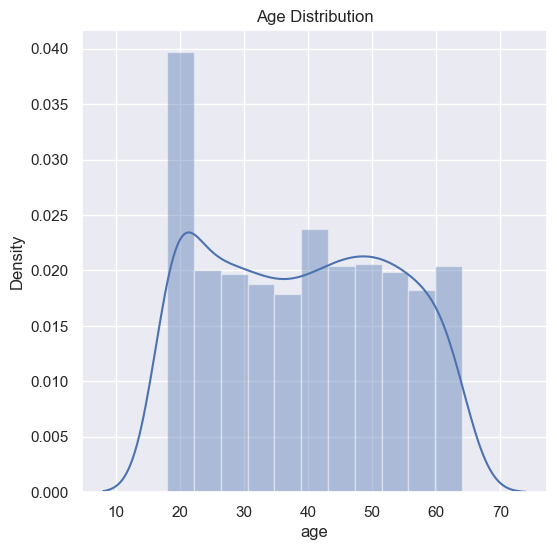

In [10]:
#distributed of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

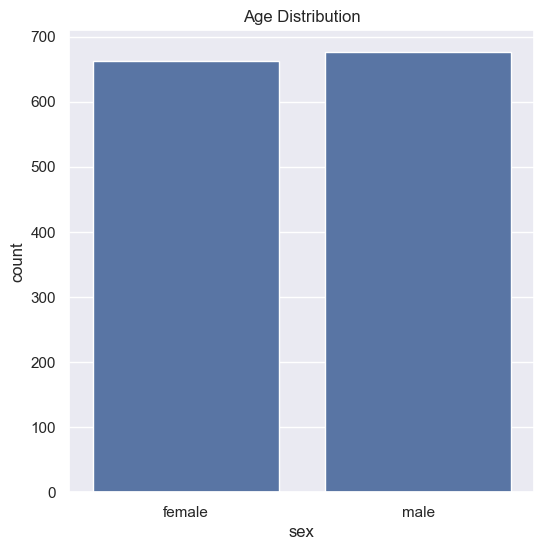

In [11]:
#Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title("sex Distribution")
plt.show()

In [12]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

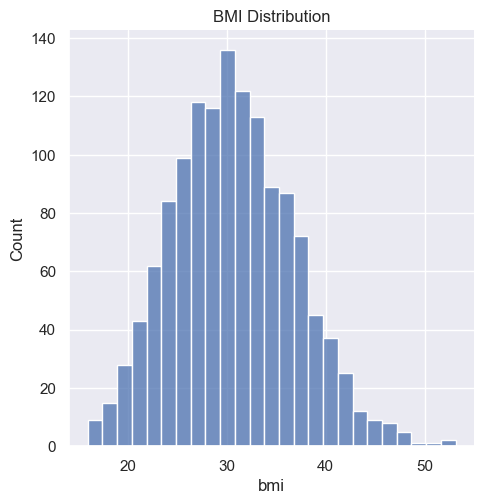

In [13]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title("BMI Distribution")
plt.show()

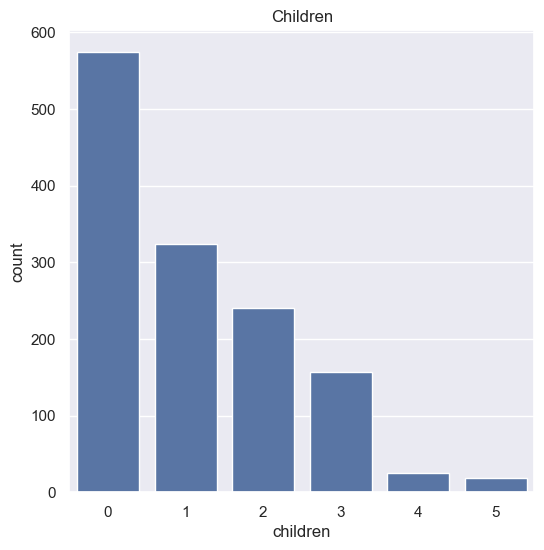

In [14]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title("Children")
plt.show()

In [15]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

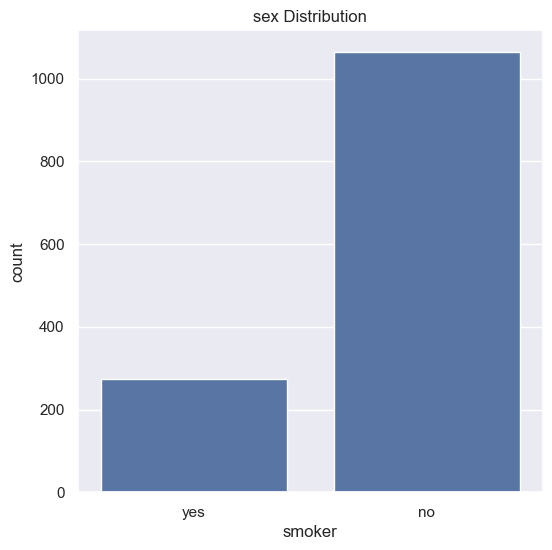

In [17]:
#smooker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title("sex Distribution")
plt.show()

In [18]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

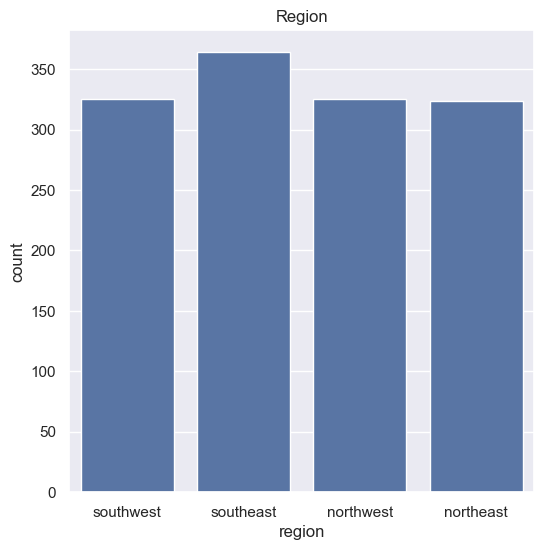

In [19]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title("Region")
plt.show()

In [20]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\Padmini\AppData\Local\Temp\ipykernel_23220\2231881300.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


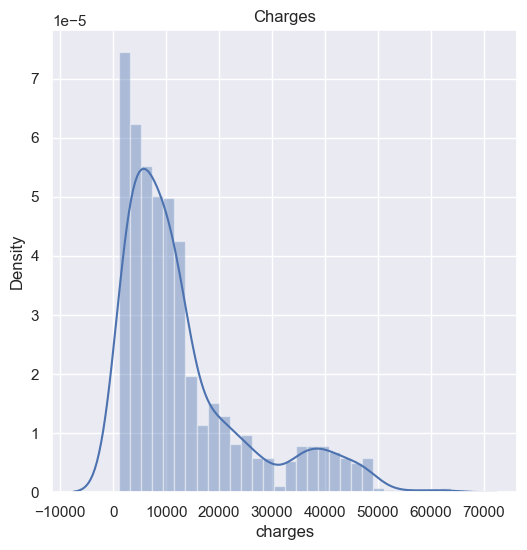

In [22]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title("Charges")
plt.show()

In [24]:
# Data Pre-Processing

#encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}})


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [27]:
# Splitting the features and target

X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']
print(X)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [28]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [31]:
#Splitting the data into Training data & Testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_test.shape)

(1338, 6) (268, 6)


In [35]:
# Model Training
#Linear Regression

reg = LinearRegression()
reg.fit(X_train, Y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)


LinearRegression()

In [36]:
#Model Evaluation
training_data_pred = reg.predict(X_train)


In [37]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_pred)
print(r2_train)

0.751505643411174


In [38]:
# prediction on test data
test_data_pred= reg.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_pred)
print(r2_test)


0.7447273869684077


In [41]:
#Building a predictive system

input_data={31,1,25.74,0,1,0}
# changing input_data to a numpy array
input_data_numpy = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_numpy.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print(prediction)

c:\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


TypeError: float() argument must be a string or a real number, not 'set'